### Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data.

In [2]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load the data 
df = pd.read_csv("bank.csv", sep=';')  # Use semicolon separator
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
# Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [7]:
# Unique values in target column
df['y'].value_counts()

y
no     4000
yes     521
Name: count, dtype: int64

In [8]:
# Convert target to binary
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [9]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()


,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,False,False,...,False,False,False,False,False,True,False,False,False,True
1,33,4789,11,220,1,339,4,0,False,False,...,False,False,False,True,False,False,False,False,False,False
2,35,1350,16,185,1,330,1,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,30,1476,3,199,4,-1,0,0,False,False,...,False,True,False,False,False,False,False,False,False,True
4,59,0,5,226,1,-1,0,0,True,False,...,False,False,False,True,False,False,False,False,False,True


In [10]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)


In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8806629834254144

Confusion Matrix:
 [[748  59]
 [ 49  49]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       807
           1       0.45      0.50      0.48        98

    accuracy                           0.88       905
   macro avg       0.70      0.71      0.70       905
weighted avg       0.89      0.88      0.88       905



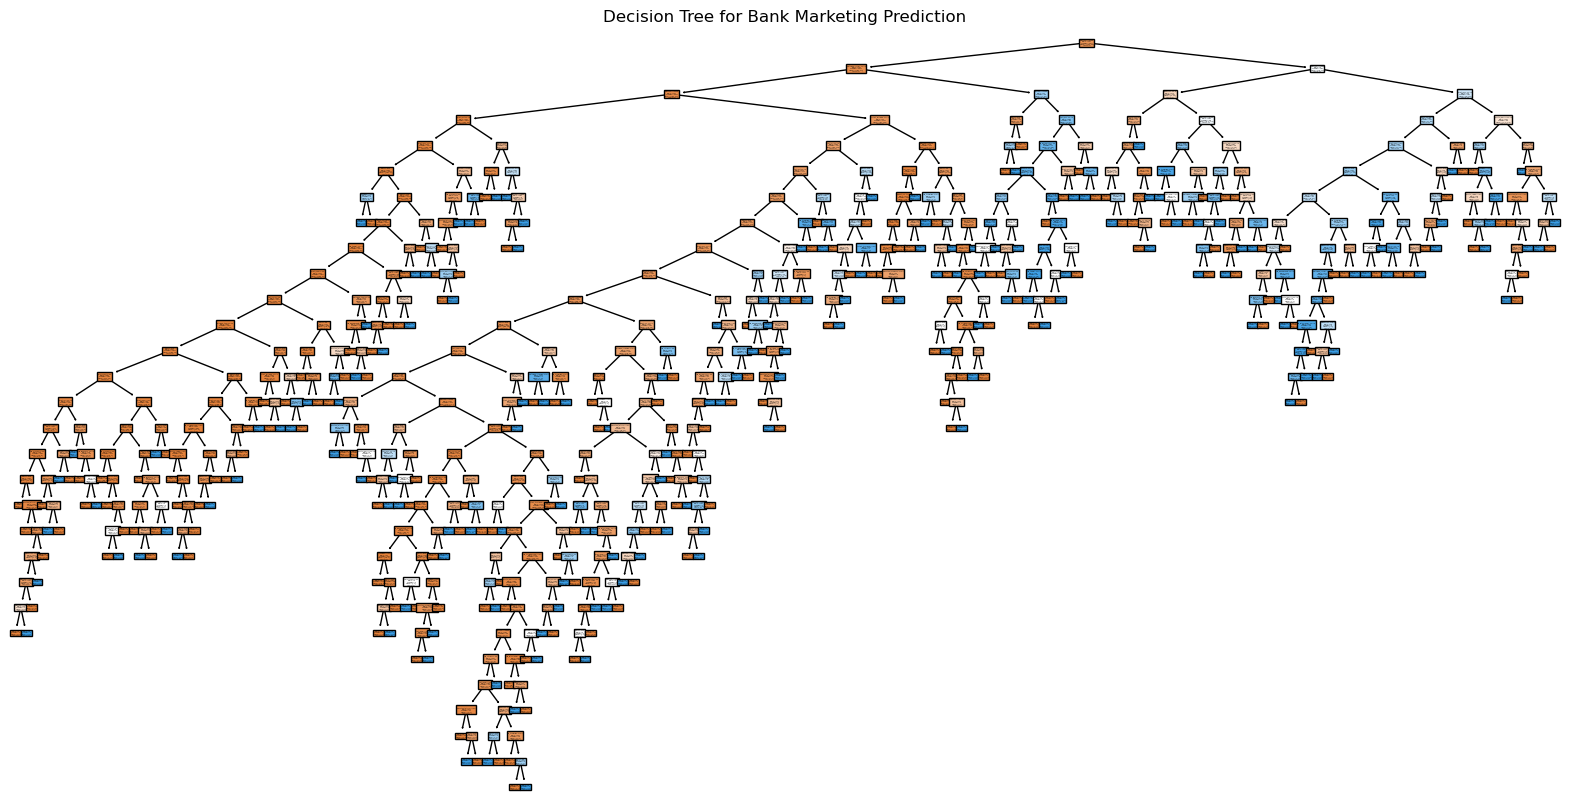

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["No", "Yes"])
plt.title("Decision Tree for Bank Marketing Prediction")
plt.show()

In [14]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
# Evaluation
print("📌 Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, log_pred))
print(classification_report(y_test, log_pred))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


📌 Logistic Regression:
Accuracy: 0.8928176795580111
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       807
           1       0.51      0.20      0.29        98

    accuracy                           0.89       905
   macro avg       0.71      0.59      0.62       905
weighted avg       0.87      0.89      0.87       905



In [15]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
# Evaluation
print("\n📌 Random Forest:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


📌 Random Forest:
Accuracy: 0.8950276243093923
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       807
           1       0.54      0.19      0.29        98

    accuracy                           0.90       905
   macro avg       0.73      0.59      0.61       905
weighted avg       0.87      0.90      0.87       905

